In [26]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns
sns.color_palette("RdBu", n_colors=7)
# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format



In [27]:
#helper functions
def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent):
    total_rows = df.shape[0]
    plt.figure(figsize=(16,8))
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.2f} %'.format(percent), ha='center')
    
def show_unique(column, df):
    
    print "There are {} unique values in column {}\n".format(str(len(df[column].unique())), column)

## stacked graphs

In [28]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

Data shape:
151158 Rows x 17 Columns


,caseid,state,age,airbag,injury,restraint,sex,inimpact,modelyr,airbagAvail,airbagDeploy,Restraint,D_injury,D_airbagAvail,D_airbagDeploy,D_Restraint,year
0,1:1:2,1,20,30,3,1,2,12,1991,no,no,yes,3,no,no,yes,1998
1,1:2:1,1,41,30,2,0,1,2,1987,no,no,no,2,no,no,no,1998
2,1:3:1,1,26,30,3,0,1,4,1983,no,no,no,4,no,no,no,1998
3,1:8:1,1,17,1,4,0,1,11,1997,yes,yes,no,4,yes,yes,no,1998
4,1:10:1,1,19,30,3,0,1,12,1998,no,no,no,4,yes,yes,no,1998
5,1:13:1,1,1,30,4,4,1,3,1991,no,no,yes,3,no,no,yes,1998
6,1:15:1,1,24,1,3,0,1,2,1995,yes,yes,no,3,yes,yes,yes,1998
7,1:19:2,1,50,30,4,3,2,3,1984,no,no,yes,3,no,no,yes,1998
8,1:21:1,1,16,30,4,3,2,12,1991,no,no,yes,3,yes,yes,yes,1998
9,1:23:1,1,53,30,4,0,1,3,1988,no,no,no,4,no,no,no,1998


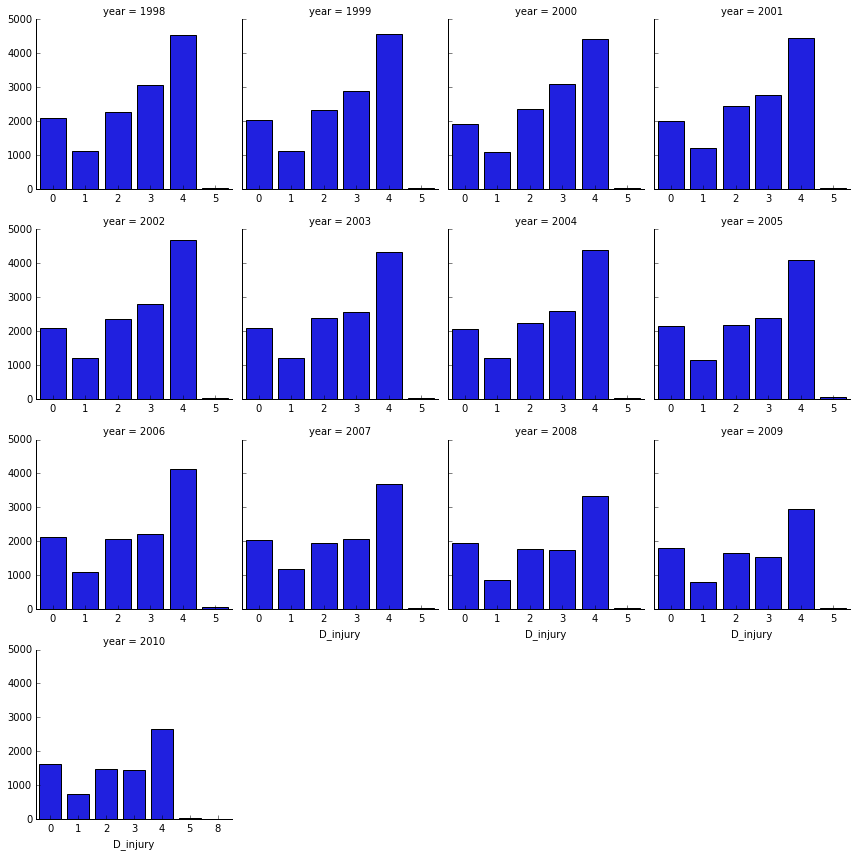

In [29]:
g = sns.FacetGrid(data, col="year", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'D_injury')

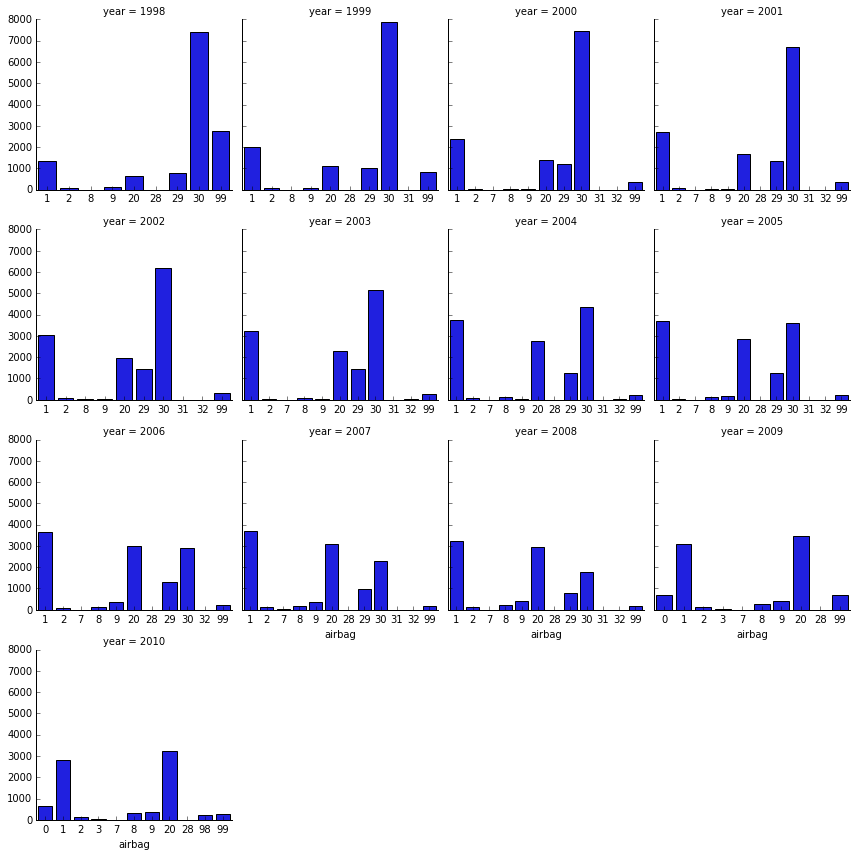

In [30]:
g = sns.FacetGrid(data, col="year", col_wrap=4, sharex=False)
g = g.map(sns.countplot, 'airbag')

### stacked bar graph type 30 vs all

In [31]:
#lazy, need to find an optimized way to do this.
airbag_df = data[['airbag', 'year']]
airbag_df.loc[airbag_df.airbag != 30, 'airbag'] = 'other'

In [32]:
airbag_df.head()

,airbag,year
0,30,1998
1,30,1998
2,30,1998
3,other,1998
4,30,1998


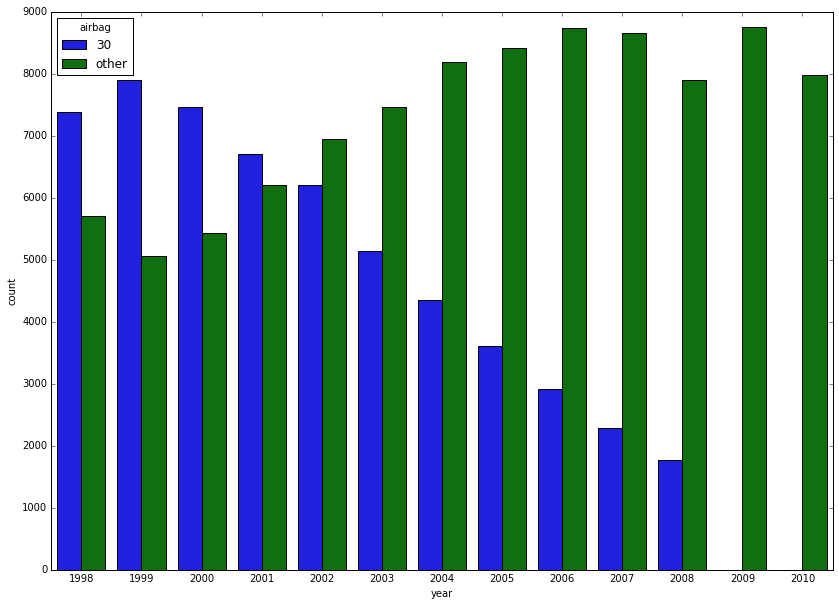

In [7]:
plt.figure(figsize = (14,10))
ax = sns.countplot(x='year', hue='airbag', data=airbag_df)
total_rows = airbag_df.shape[0]

### Fatal Injuries in  states

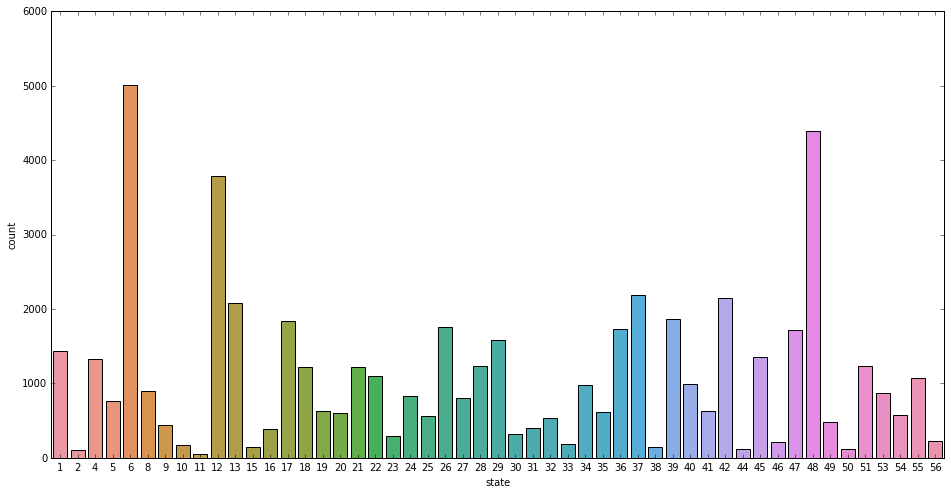

In [8]:
#states with a;; passangers deaths
fatalp_states = data[(data.injury == 4)]
count_plot('state', 'x', fatalp_states, 'notshow')

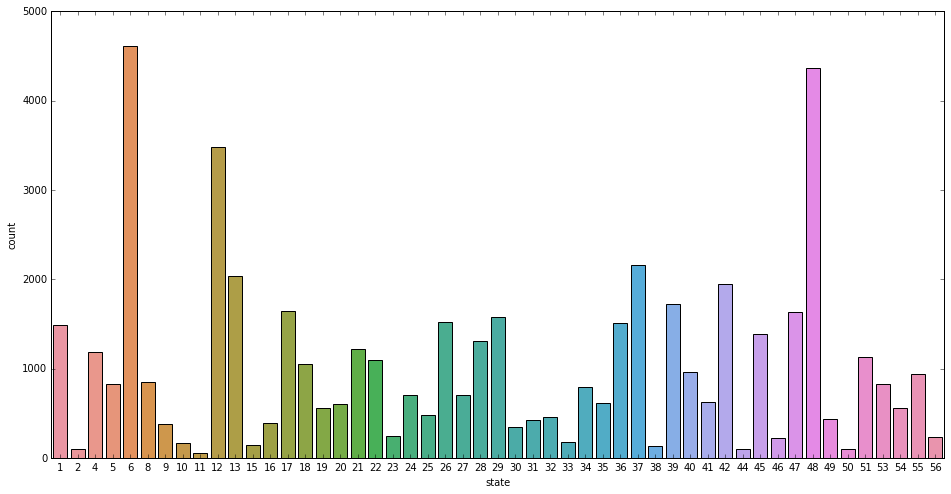

In [9]:
#states with driver deaths
fatald_states = data[(data.D_injury == 4)]
count_plot('state', 'x', fatald_states, 'notshow')

In [80]:
#g = sns.FacetGrid(fatald_states, col="state", col_wrap=4, sharex=False)
#g = g.map(sns.countplot, 'D_injury')

### Injury over years 

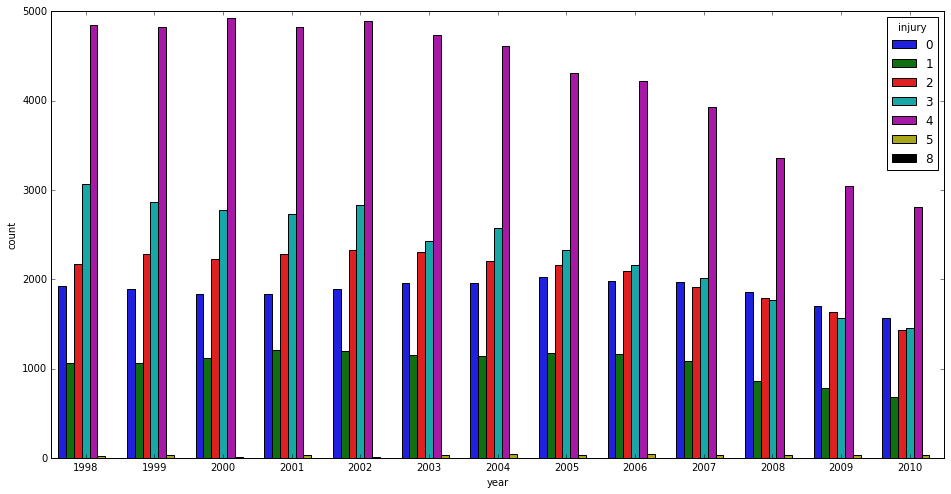

In [18]:
plt.figure(figsize=(16,8))
sns.countplot(x='year', hue='injury', data=data)

In [34]:
#stacked chart for passengers death
#todo

In [37]:
#injury vs others
injuryother = data[['year', 'injury']]
injuryother.loc[injuryother.injury != 4, 'injury'] = 'other'
injuryother.head()

,year,injury
0,1998,other
1,1998,other
2,1998,other
3,1998,4
4,1998,other


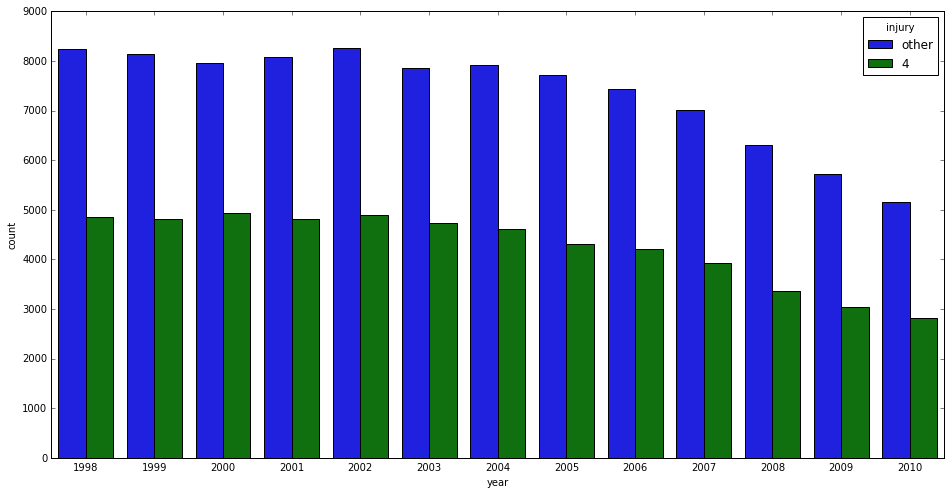

In [40]:
plt.figure(figsize=(16,8))
sns.countplot(x='year', hue='injury', data=injuryother)

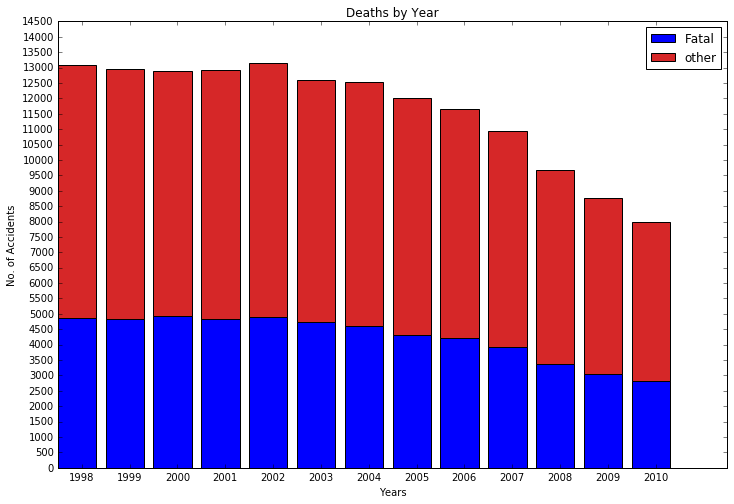

In [67]:
plt.figure(figsize=(12,8))
#stacked
fataldf = injuryother[injuryother.injury == 4]
otherdf = injuryother[injuryother.injury == 'other']
years = data.year.unique()
fatal = []
other = []
#for fatal
for year in years:
    total = len(fataldf[fataldf.year == year])
    fatal.append(total)

#for other
for year in years:
    total = len(otherdf[otherdf.year == year])
    other.append(total)

#arange x locations for years
ind = np.arange(len(years))

width = 1       # the width of the bars: can also be len(x) sequence

#positions for xticks
xticks_pos = [i+(width/2) for i in ind]

p1 = plt.bar(ind, fatal)
p2 = plt.bar(ind, other, bottom=fatal, color='#d62728')

plt.ylabel('No. of Accidents')
plt.xlabel('Years')
plt.title('Deaths by Year')

plt.xticks(xticks_pos, years)
plt.yticks(np.arange(0, 15000, 500))
plt.legend((p1[0], p2[0]), ('Fatal', 'other'), loc=0)
plt.show()